In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("jobs.csv")
print(data.head())

   Unnamed: 0                    Job Salary Job Experience Required  \
0           0   Not Disclosed by Recruiter               5 - 10 yrs   
1           1   Not Disclosed by Recruiter                2 - 5 yrs   
2           2   Not Disclosed by Recruiter                0 - 1 yrs   
3           3       2,00,000 - 4,00,000 PA.               0 - 5 yrs   
4           4   Not Disclosed by Recruiter                2 - 5 yrs   

                                          Key Skills  \
0                      Media Planning| Digital Media   
1   pre sales| closing| software knowledge| clien...   
2   Computer science| Fabrication| Quality check|...   
3                                  Technical Support   
4   manual testing| test engineering| test cases|...   

                                Role Category  \
0                                 Advertising   
1                                Retail Sales   
2                                         R&D   
3  Admin/Maintenance/Security/Datawareho

In [2]:
data = data.drop("Unnamed: 0",axis=1)

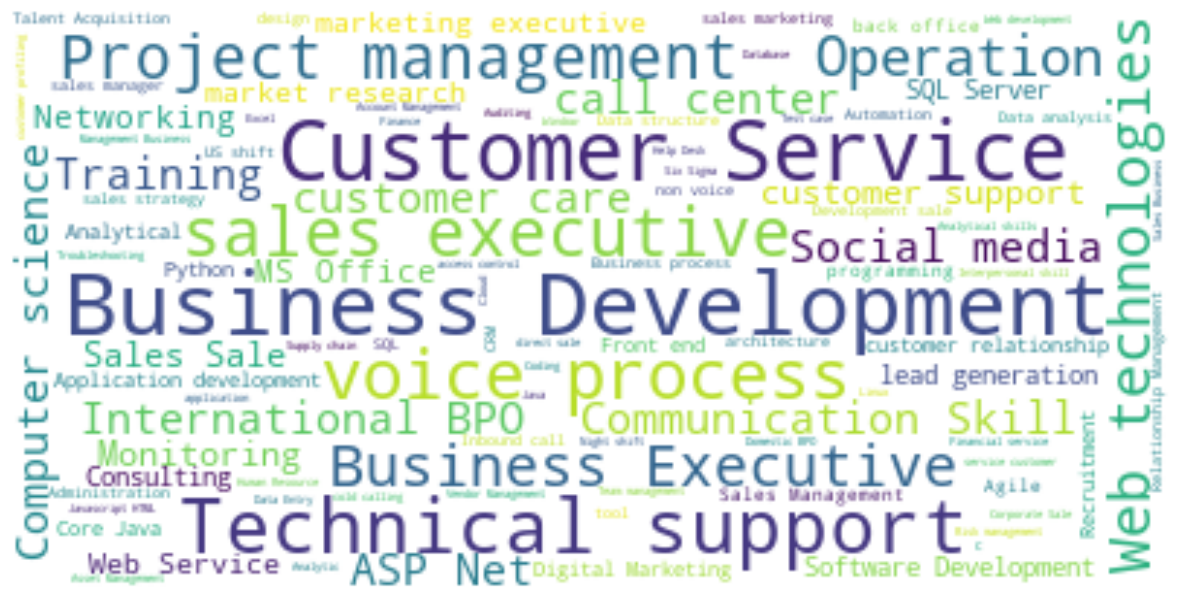

In [3]:
text = " ".join(i for i in data["Key Skills"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

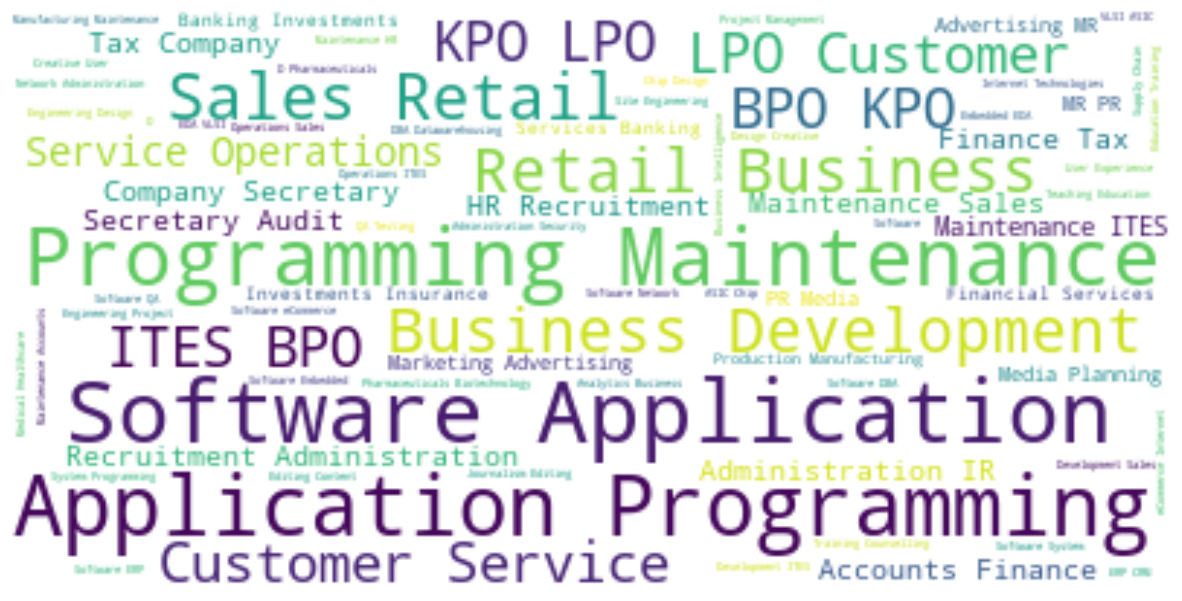

In [5]:
text = " ".join(i for i in data["Functional Area"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

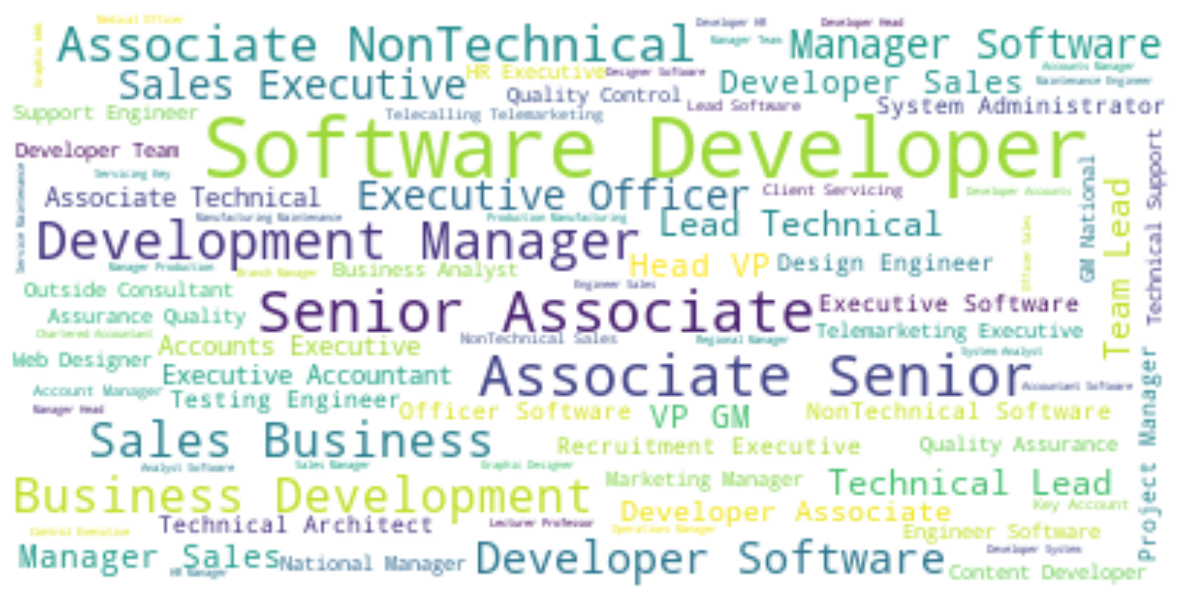

In [4]:
text = " ".join(i for i in data["Job Title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
from sklearn.feature_extraction import text
feature = data["Key Skills"].tolist()
tfidf = text.TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)
indices = pd.Series(data.index, index=data['Job Title']).drop_duplicates()

In [6]:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse=True)
    similarity_scores = similarity_scores[0:5]
    newsindices = [i[0] for i in similarity_scores]
    return data[['Job Title', 'Job Experience Required', 
                 'Key Skills']].iloc[newsindices]

print(jobs_recommendation("Software Developer"))

                                       Job Title Job Experience Required  \
6249          Sales/Business Development Manager               4 - 5 yrs   
6248                          Software Developer               2 - 5 yrs   
6247  Associate/Senior Associate -(NonTechnical)              5 - 10 yrs   
6246                          Software Developer               1 - 6 yrs   
6245  Associate/Senior Associate -(NonTechnical)               1 - 4 yrs   

                                             Key Skills  
6249   Networking| Printing| Aerospace| Raw material...  
6248   PHP| MVC| Laravel| AWS| SDLC| Wordpress| LAMP...  
6247   Data analysis| Investment banking| Financial ...  
6246   Coding| Wordpress| Commerce| HTML| Troublesho...  
6245   client servicing| client support| background ...  


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Load your data
data = pd.read_csv('C:\\Users\\hp\\SCD-Profile-Score\\jobs.csv') # Use the corrected path

# Prepare the TF-IDF vectorizer
feature = data["Key Skills"].tolist()
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)  # Limit features to reduce memory usage
tfidf_matrix = tfidf.fit_transform(feature)

# Save only the vectorizer and data, without precomputing the similarity matrix
with open('model.pkl', 'wb') as f:
    pickle.dump((tfidf, data), f)  # Save only the TF-IDF vectorizer and data


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load data
df = pd.read_csv(r'C:\Users\hp\SCD-Profile-Score\jobs.csv')

# Clean data
df.dropna(inplace=True)

# Convert key skills to a list
df['Key Skills'] = df['Key Skills'].apply(lambda x: x.split(','))

# Join skills into a single string for vectorization
df['Key Skills String'] = df['Key Skills'].apply(lambda x: ' '.join(x))

# Vectorize the skills using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Key Skills String'])

# Target variable (Role Category)
y = df['Role Category']


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model2 = LogisticRegression()
model2.fit(X_train, y_train)

# Predict the skills for the test set
y_pred = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


Model Accuracy: 61.01%


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Load the dataset
df = pd.read_csv(r'C:\Users\hp\SCD-Profile-Score\jobs.csv')

# Clean and preprocess the data
df.dropna(inplace=True)
df['Key Skills'] = df['Key Skills'].apply(lambda x: x.split(','))
df['Key Skills String'] = df['Key Skills'].apply(lambda x: ' '.join(x))

# Vectorize the skills using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Key Skills String'])

# Target variable (Role Category)
y = df['Role Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Model Accuracy: {accuracy * 100:.2f}%')

# Save the trained model and vectorizer using joblib
joblib.dump(rf_model, 'model2.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("Model and vectorizer saved as model2.pkl and vectorizer.pkl")

# Load the saved model and vectorizer
rf_model = joblib.load('model2.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Predicting skills for a new role
target_role = "Data Scientist"
target_role_vec = vectorizer.transform([target_role])

# Ensure the feature dimension matches
print(f'Features for target role: {target_role_vec.shape[1]}')
print(f'Features expected by the model: {X_train.shape[1]}')

# Predict using the model
predicted_skills = rf_model.predict(target_role_vec)
print("Skills needed:", predicted_skills)


Random Forest Model Accuracy: 61.87%
Model and vectorizer saved as model2.pkl and vectorizer.pkl
Features for target role: 6461
Features expected by the model: 6461
Skills needed: ['Programming & Design']


In [19]:
# Open the file and print the first few bytes to check if it's a valid pickle file
with open(r'C:\Users\hp\SCD-Profile-Score\vectorizer.pkl', 'rb') as f:
    print(f.read(10))  # Read the first 10 bytes to see the format


b'\x80\x04\x95\x08\x03\x00\x00\x00\x00\x00'


In [20]:
import joblib

# Save vectorizer and model using joblib
joblib.dump(vectorizer, 'vectorizer.joblib')
joblib.dump(rf_model, 'model2.joblib')

# Load vectorizer and model
vectorizer = joblib.load(r'C:\Users\hp\SCD-Profile-Score\vectorizer.joblib')
model2 = joblib.load(r'C:\Users\hp\SCD-Profile-Score\model2.joblib')


In [22]:
pip install scikit-learn==1.2.2


Note: you may need to restart the kernel to use updated packages.
